In [1170]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import xticks

# To Scale our data
from sklearn.preprocessing import StandardScaler

# To import PCA module
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# For warning
import warnings
warnings.filterwarnings('ignore')

# To perform train-test splitting
from sklearn.model_selection import train_test_split

# For Scaling
from sklearn.preprocessing import StandardScaler

# To perofrm Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [1171]:
# reading the file
leads = pd.read_csv(r"H:\UpGrad\Machine Learning 1\Lead Scoring Case Study\Lead Scoring Assignment\Leads.csv")
# Displaying first few rows of the file
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1172]:
# Displaying the shape of the file
leads.shape

(9240, 37)

In [1173]:
# Displaying the info about the file
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [1174]:
# Describing the file
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1175]:
# Converting SELECT to NAN
leads = leads.replace('Select',np.nan)

In [1176]:
# Displaying all the null values in the each column
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1177]:
# Checking the precentage of the null value in each column
round((leads.isnull().sum()/len(leads.index)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1178]:
# Removing the column having more than 70% null values
leads = leads.drop(leads.loc[:,list(round(100*(leads.isnull().sum()/len(leads.index)), 2)>70.00)],axis =1)

In [1179]:
# Checking the precentage of the null value in each column and sorting them in descending order
round((leads.isnull().sum()/len(leads.index)*100),2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted 

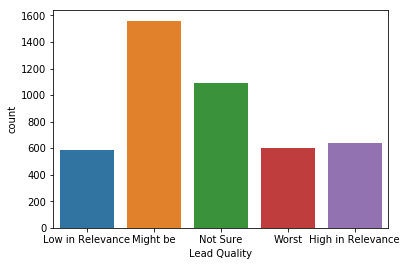

In [1180]:
# Plotting the Lead Quality variable
sns.countplot(leads['Lead Quality'])

- Here looking at the graph we could say that the null values in the variavle 'Lead Quality' can be put in the catigory of 'Not Sure' since the varaible 'Lead Quality' indicates quality of the leads depending upon the data and the intuition.... since we don't know the quality for the leads for the rows having null values so we assign them to the categories 'Not Sure'.

In [1181]:
# Assigning the null values to the Not Sure categories
leads['Lead Quality'] = leads['Lead Quality'].replace(np.nan,'Not Sure')

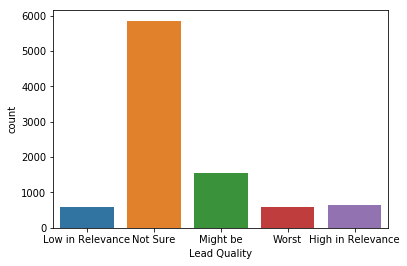

In [1182]:
# Checking the variable Lead Quality again
sns.countplot(leads['Lead Quality'])

- Here you could see that (Ignoring the Not Sure category) category 'might be' has maximum nuber and all the other categories are nearly equal in number.

<Figure size 432x288 with 0 Axes>

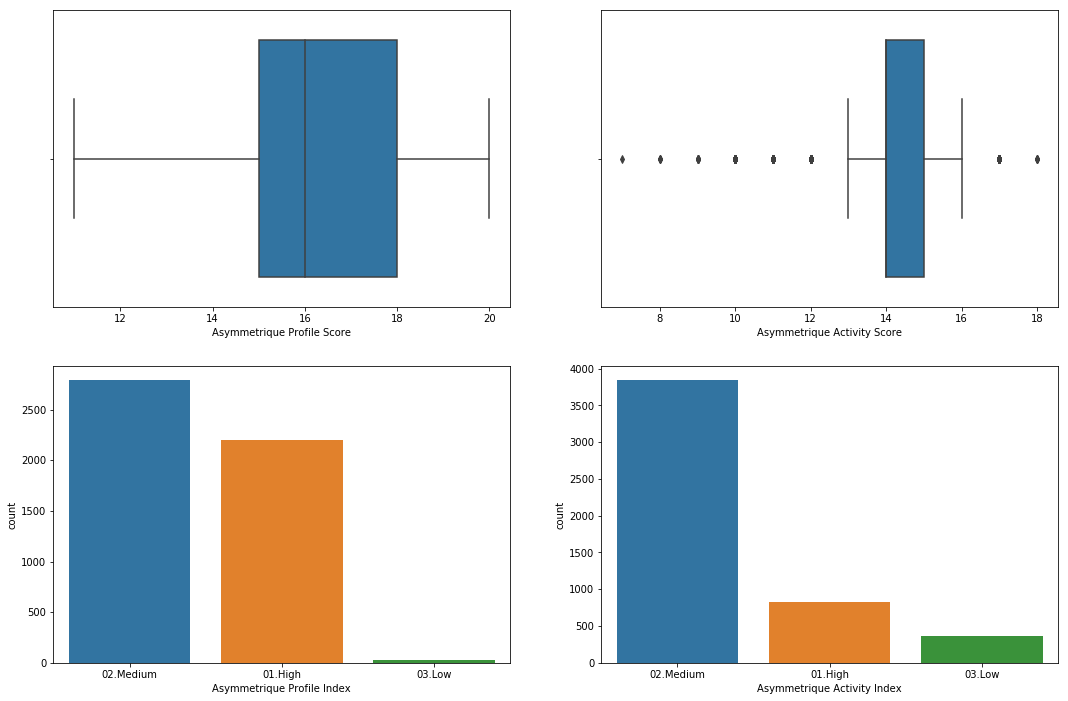

In [1183]:
# Plotting variables
plt.figure(1)
plt.figure(figsize =(18,12))
plt.subplot(2,2,1)
# Box plot for the variable 'Asymmetrique Profile Score' since it has a numerical values
sns.boxplot(leads['Asymmetrique Profile Score'])
plt.subplot(2,2,2)
# Box plot for the variable 'Asymmetrique Acitivity Score' since it has a numerical values
sns.boxplot(leads['Asymmetrique Activity Score'])
plt.subplot(2,2,3)
# Bar plot for the variable 'Asymmetrique Profile Index' since it has a categorical values
sns.countplot(leads['Asymmetrique Profile Index'])
plt.subplot(2,2,4)
# Bar plot for the variable 'Asymmetrique Activity Index' since it has a categorical values
sns.countplot(leads['Asymmetrique Activity Index'])

- In all the above four variables there are around 45% missing values.
- For the categorical variables there aren't any suitable substitute for the null value and for the numerical variables, 45% missing values are a hudge amount of number to replace with any value.
- So we will drop these columns.

In [1184]:
# Dropping the above 4 columns
leads = leads.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'],axis =1)

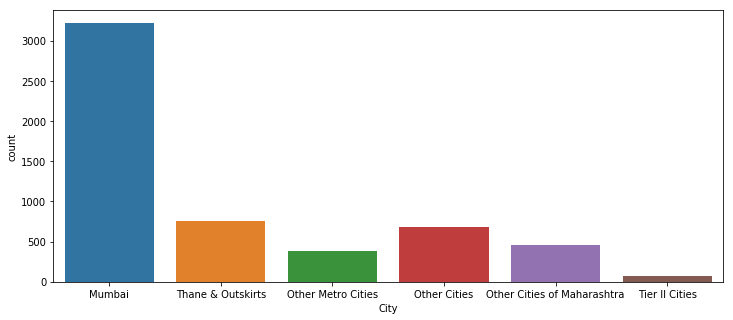

In [1185]:
# Plotting the variable City
plt.figure(figsize=(12,5))
sns.countplot(leads['City'])

- In variable 'City' we could see that the category 'Mumbai' is maximum(around 60%). And is far ahead of any other categories.
- We will impute the null value with the most frequent category 'Mumbai'

In [1186]:
# imputing the null vlaue with the category 'Mumbai'
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

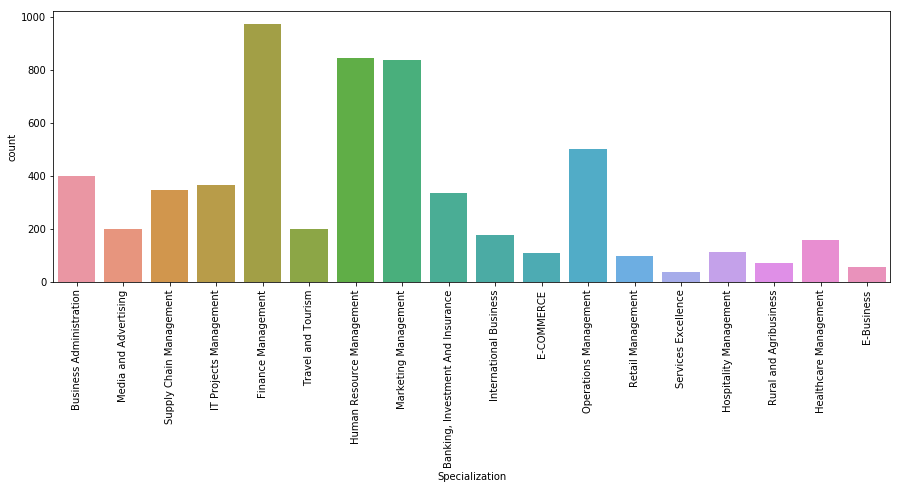

In [1187]:
# Plotting the variable 'Specialization'
plt.figure(figsize = (15,5))
sns.countplot(leads['Specialization'])
xticks(rotation = 90)

- This category Specialization tells us about the industry customer is specialized
-  Here we could see that the category 'Financial Management' has the maximum number of customer followed by 'Human Resource Mangement' and 'Marketing Management'. 
- Here to impute null value we will create a new column called 'Other'. Since people who doesn't fill this variable are genrally those who do not find their profession in the list.

In [1188]:
# imputing the null value into a new column called 'Other'
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

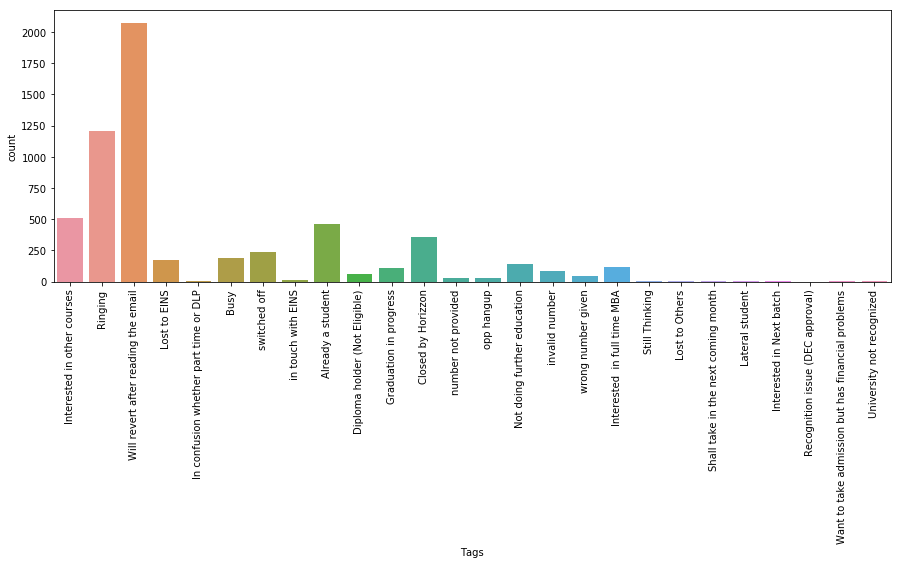

In [1189]:
# Plotting the variable 'Tags'
plt.figure(figsize = (15,5))
sns.countplot(leads['Tags'])
xticks(rotation = 90)

- This variable tells us about the current status of the customer.
- Here we could see that around 40% of the leads are tagged as 'Will revert after reading the email'. 
- Here we will impute the missing value with the category having the maximum value.

In [1190]:
# Imputing the missing value with the category 'Will revert after reading the email'
leads['Tags'] = leads['Tags'].replace(np.nan,'Will revert after reading the email')

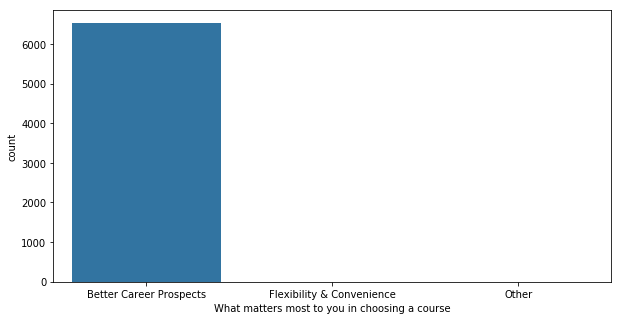

In [1191]:
# plotting the variable 'What matters most to you in choosing a course'
plt.figure(figsize=(10,5))
sns.countplot(leads['What matters most to you in choosing a course'])

- In this column you could see that almost all the leads are to the category 'Better Career Prospect'
- Here we will impute the missing value with the category 'Better Career Prospect'

In [1192]:
# Imputting the missing value with the category 'Better Career Prospect'
leads['What matters most to you in choosing a course']= leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospect')

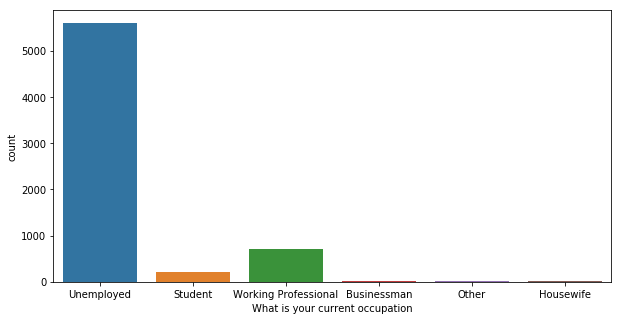

In [1193]:
# Plotting the variable 'What is your current occupation'
plt.figure(figsize =(10,5))
sns.countplot(leads['What is your current occupation'])

- Here you could see that more than 80% of the leads are in the category 'Unemployed'
- We will impute the missing value with the category 'Unemployed'

In [1194]:
# imputing the missing value with the category 'Unemployed'
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

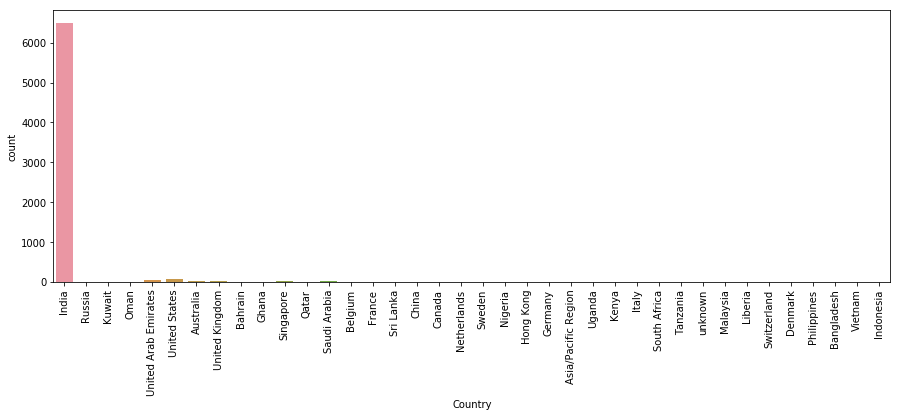

In [1195]:
# plotting the variable 'Country'
plt.figure(figsize=(15,5))
sns.countplot(leads['Country'])
xticks(rotation =90)

- Here you could see that almost all the leads are from category 'India'.
- We will impute the missing value with the category 'India'.

In [1196]:
# Imputting the missing value with the category 'India'
leads['Country'] = leads['Country'].replace(np.nan,'India')

- Now remaining variables has less than 1.5% missing values.
- We will remove the rows having these missing value.

In [1197]:
# Dropping the rows having missing values
leads = leads.dropna()

In [1198]:
# Rehecking the precentage of the null value in each column
round((leads.isnull().sum()/len(leads.index)*100),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

- Now all the missing values have been treated

In [1199]:
# No of rows and columns missing value treatment
leads.shape

(9074, 31)

# Exploratory Data Analysis

- Here target variablee is Converted

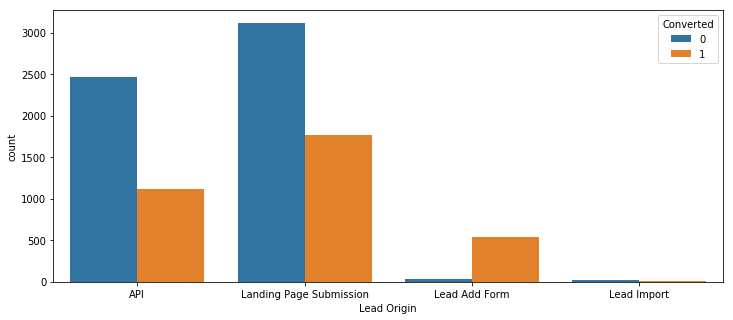

In [1200]:
# Analysis of the varaible 'Lead Origin'
# Plotting the variable 'Lead Origin' with target varaible
plt.figure(figsize = (12,5))
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = leads )

- Maximum number of leads are of category 'Landing Page Submission' followed by category 'API'.
- In both the category 'Landing Page Submission' and 'API' the conversion is less than 40%.
- Category 'Lead Add Form' has conversion around 90%, but the number of leads are very less.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

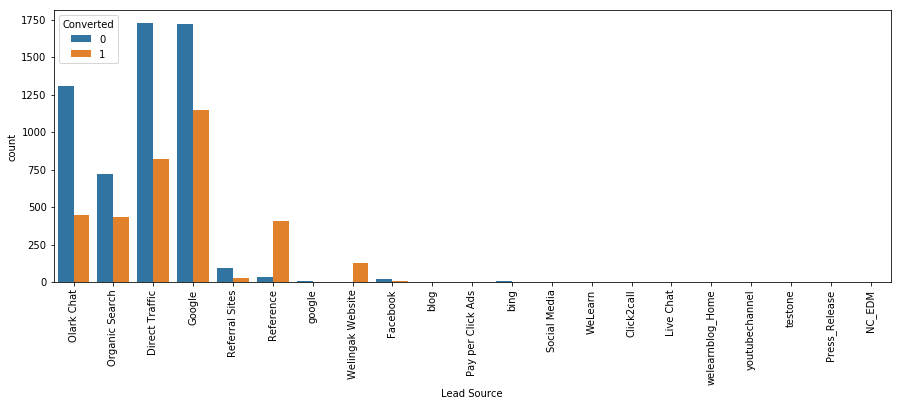

In [1201]:
# Analysis of the varaible 'Lead Source'
# Plotting the variable 'Lead Source' with target varaible
plt.figure(figsize = (15,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = leads)
xticks(rotation = 90)

- Here you could see that few categories are repeated due to spelling errors

In [1202]:
# Converting category 'google' to 'Google'
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
# Lots categories are very small in count so we can club them together into a separate category named 'Other'
leads['Lead Source'] = leads['Lead Source'].replace(['NC_EDM','Press_Release','testone','youtubechannel','welearnblog_Home','Live Chat','Click2call','WeLearn','Social Media','bing','Pay per Click Ads','blog','Facebook'],'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

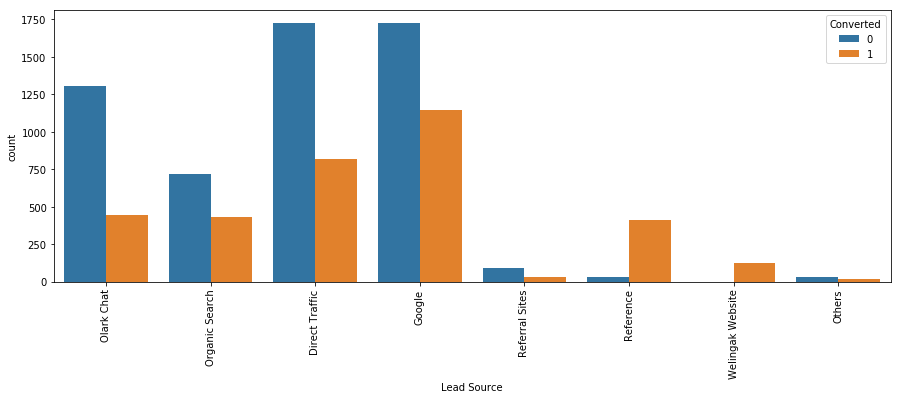

In [1203]:
# Plotting the variable 'Lead Source' with target varaible
plt.figure(figsize = (15,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = leads)
xticks(rotation = 90)

- Maximum number of leads are of category 'Google' followed by category 'Direct Traffic' and 'Olark Chat'.
- But the conversion rate in the these above categories are less than 40%.
- Category 'Rference' and 'Welingak Website' has the conversion rate of around 90%, but total count of leads are very small for these categories.

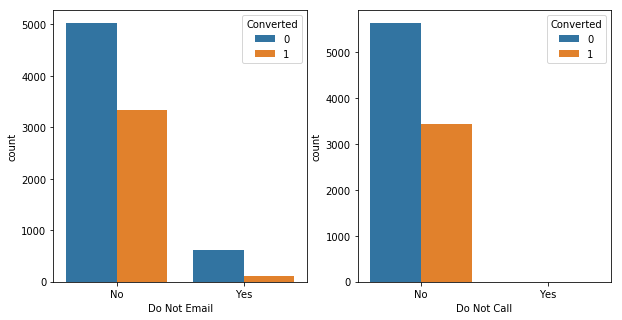

In [1204]:
# Analysis of the varaible 'Do Not Email' and 'Do Not Call'
plt.figure(figsize = (10,5))
# Plotting the variable 'Do Not Email' with target varaible
plt.subplot(1,2,1)
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = leads)
# Plotting the variable 'Do Not Call' with target varaible
plt.subplot(1,2,2)
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = leads)

- In the variable 'Do Not Email' and 'Do Not Call' we could see that the maximum count is for the category 'No'.

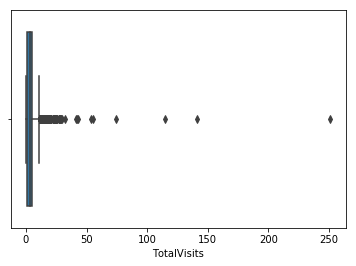

In [1205]:
# Plotting the variable 'TotalVisits'
sns.boxplot(leads['TotalVisits'])

- From abouve graph it is quite clear that this variable contains a lot of outliers. We will need to treat it.

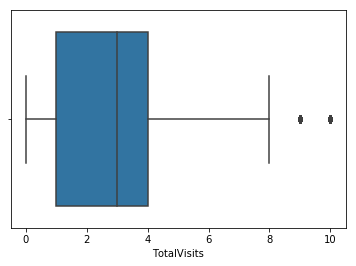

In [1206]:
# Outlier treatment for the variable 'TotalVisits'
Q1 = leads['TotalVisits'].quantile(0.05)
Q3 = leads['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['TotalVisits'] >= Q1) & (leads['TotalVisits'] <= Q3)]
sns.boxplot(leads['TotalVisits'])

- Now the above graph have very less outliers.

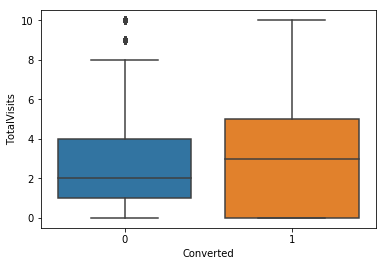

In [1207]:
# Analysing the variable 'TotalVisits' with variable 'Converted'
sns.boxplot(y = leads['TotalVisits'], x = leads['Converted'])

- From the above graph we could see that median of the Converted are little higher than that of Not Convertd.

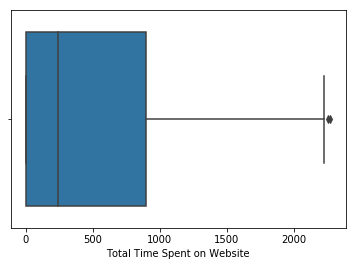

In [1208]:
# Analysing the variable 'Total Time Spent on Website'
# Plotting the variable 'Total Time Spent on Website'
sns.boxplot(leads['Total Time Spent on Website'])

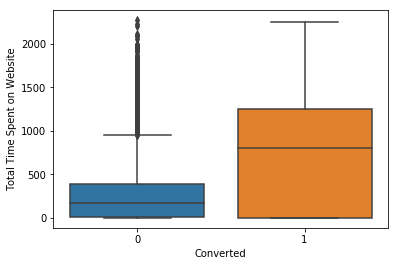

In [1209]:
# Plotting the variable 'Total Time Spent on Website' with variable 'Converted'
sns.boxplot(y=leads['Total Time Spent on Website'],x=leads['Converted'])

- From the above graph we could see that leads which are converted spend more time on the website than those leads which are not converted.

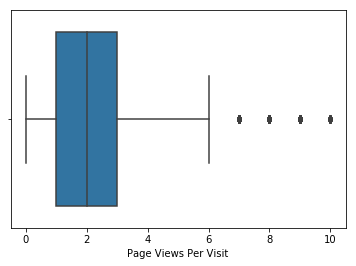

In [1210]:
# Plotting the variable 'Page Views Per Visit'
sns.boxplot(leads['Page Views Per Visit'])

- Here we could see that this variable needs an outlier treatment.

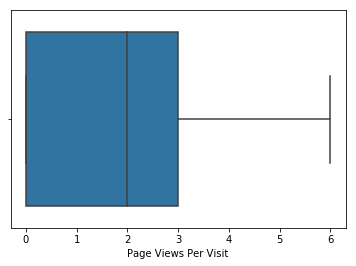

In [1211]:
#Removing the outlier for the variable 'Page Views Per Visit'
Q1 = leads['Page Views Per Visit'].quantile(0.05)
Q3 = leads['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1) & (leads['Page Views Per Visit'] <= Q3)]
sns.boxplot(leads['Page Views Per Visit'])

- Now all the ouliers has been removed.

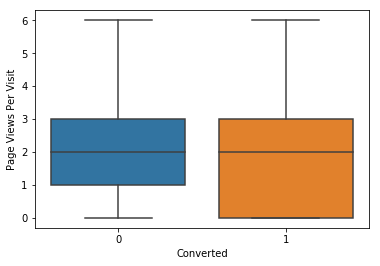

In [1212]:
# PLotting the variable 'Page Views Per Visit' with target variable
sns.boxplot(y=leads['Page Views Per Visit'],x=leads['Converted'])

- The median of the varaiable 'Page Views Per Visit' for both the converted and non converted leads are same.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

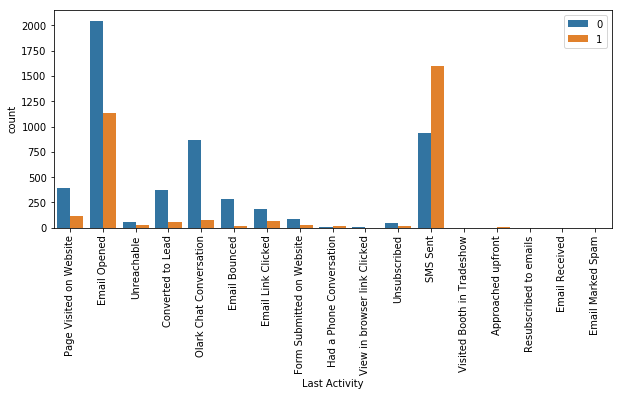

In [1213]:
# Analysis of the varaible 'Last Activity'
# Plotting the variable 'Last Activity' with target varaible
plt.figure(figsize = (10,4))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = leads)
plt.legend(loc='upper right')
xticks(rotation = 90)

- Here we could see that lots of categories have very samll count, so we could club them together into a separate category known as 'Other Activity'.

In [1214]:
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

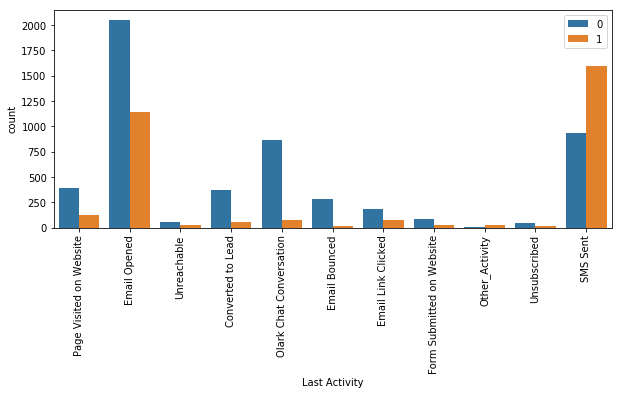

In [1215]:
# Plotting again the variable 'Last Activity' with target variable
plt.figure(figsize = (10,4))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = leads)
plt.legend(loc='upper right')
xticks(rotation = 90)

- Most of the leads have Email Opened as Last Categories.
- Maximum Conversion is for the last activity being SMS Sent.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

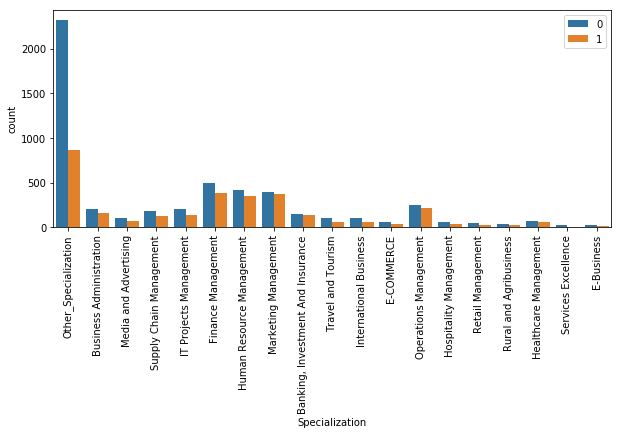

In [1216]:
# Analysing the variable 'Specialization'
# Plotting the variable 'Specialization' with target variable
plt.figure(figsize = (10,4))
sns.countplot(x = 'Specialization', hue = 'Converted', data = leads)
plt.legend(loc='upper right')
xticks(rotation = 90)

- Here we could see that count for the category 'Other_Specialization' is maximum but the for the varaible Specialization we should be focusing more on the variable having most conversion rate.

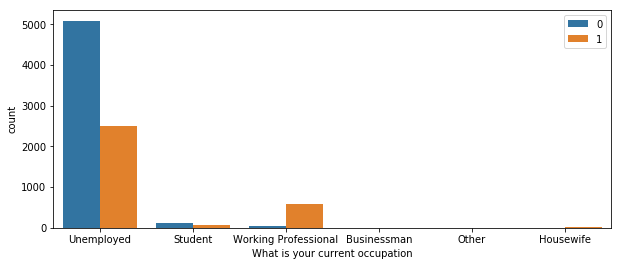

In [1217]:
# Analysing the variable 'What is your current occupation'
# PLotting the variable 'What is your current occupation' with the target variable
plt.figure(figsize = (10,4))
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = leads)
plt.legend(loc='upper right')

In [1218]:
# Chaging the name of the category 'Other' to 'Other_Occupation'
leads['What is your current occupation'] = leads['What is your current occupation'].replace('Other','Other_Occupation')

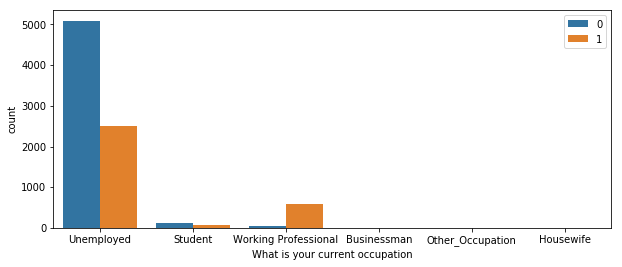

In [1219]:
# PLotting the variable 'What is your current occupation' with the target variable
plt.figure(figsize = (10,4))
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = leads)
plt.legend(loc='upper right')

- From the above graph we could see that the maximum leads are Unemployed.
- But Maximum rate of conversion is for the Working Professional.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

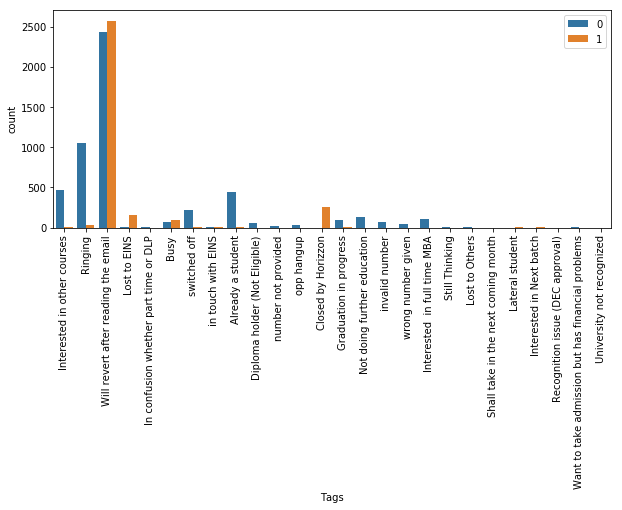

In [1220]:
# Analysing the variable 'Tags'
# PLotting the variable 'Tags' with the target variable
plt.figure(figsize = (10,4))
sns.countplot(x = 'Tags', hue = 'Converted', data = leads)
plt.legend(loc='upper right')
xticks(rotation = 90)

- Here lots of categories are very samll count, so we could club them together into a new category.

In [1221]:
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP','in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

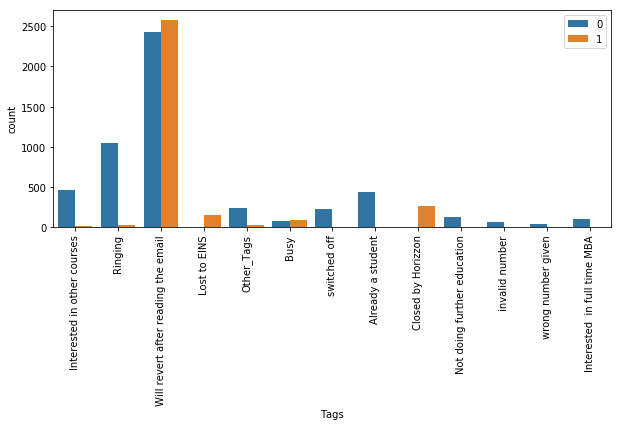

In [1222]:
# PLotting again the variable 'Tags' with the target variable
plt.figure(figsize = (10,4))
sns.countplot(x = 'Tags', hue = 'Converted', data = leads)
plt.legend(loc='upper right')
xticks(rotation = 90)

- Maximum number of leads are of those who said that they will revert after reading the email and those are also maximum number of converted leads.
- Maximum percentage of conversion is for the category 'Closed by Horizzon' and 'Lost to EINS'.

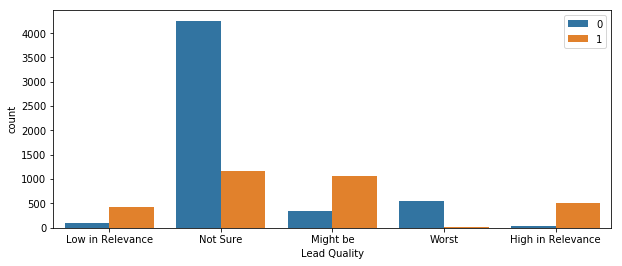

In [1223]:
# Analysing for the variable 'Lead Quality'
# PLotting the variable 'Lead Quality' with the target variable
plt.figure(figsize = (10,4))
sns.countplot(x = 'Lead Quality', hue = 'Converted', data = leads)
plt.legend(loc='upper right')

- In this variable you could see that the maximum counts of lead is where Lead Quality is Not Sure. But its conversion percentage is very low.
- Conversion rate of Category High in Relevence is highest followed by Might be. But the count of these categories are small.

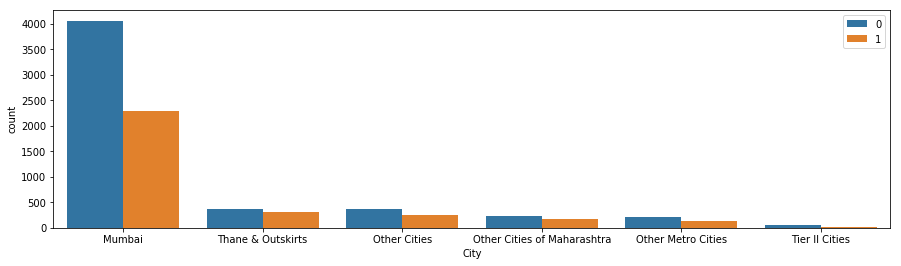

In [1224]:
# Analysing for the variable 'City'
# PLotting the variable 'City' with the target variable
plt.figure(figsize = (15,4))
sns.countplot(x = 'City', hue = 'Converted', data = leads)
plt.legend(loc='upper right')

- Most leads are from Mumbai with converion rate around 30%.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

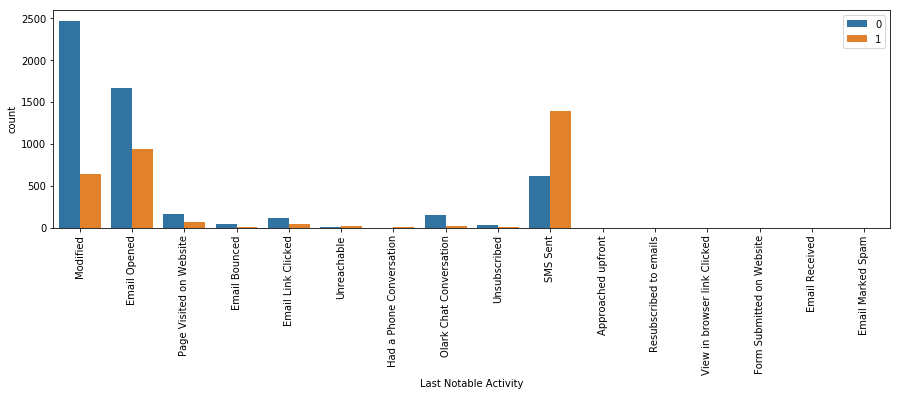

In [1225]:
# Analysing the variable 'Last Notable Activity'
# PLotting the variable 'Last Notable Activity' with the target variable
plt.figure(figsize = (15,4))
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = leads)
plt.legend(loc='upper right')
xticks(rotation = 90)

- Here we could see that the maximum leads are of 'Modified', but its conversion rate is very small.
- The converion rate of 'SMS Sent' category is maximum.

- From the above Univariate analysis we are able to find out few variables which are not helping in deciding whether the lead will convert or not.

In [1226]:
# Dropping the columns which will not help in the model
leads = leads.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],axis = 1)

In [1227]:
# Checking the shape of the file
leads.shape

(8445, 16)

In [1228]:
# Checking the first few rows of the file
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [1229]:
# Converting binary variable Yes/No to 1/0
# converting variable 'Do Not Email'
leads['Do Not Email'] = leads['Do Not Email'].map({'Yes': 1, "No": 0})
#converting variable 'Do Not Call'
leads['Do Not Call'] = leads['Do Not Call'].map({'Yes': 1, "No": 0})

In [1230]:
# Creating dummy variables for the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1231]:
# Merging the dummy file to the leads file
leads = pd.concat([leads, dummy1], axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [1232]:
# Droping the original columns whose dummies has been created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)
leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


# Model Buliding

- Train-Test split

In [1233]:
# putting all the variables on which model will build in x
X = leads.drop(['Prospect ID','Converted'], axis=1)
# putting the target variable in y
y = leads['Converted']

In [1234]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

- Scaling

In [1235]:
# Scaling the numeriacl variables
scaler = StandardScaler()
# Creating a list of numerical variables
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
# Fitting it on data
X_train[num_var] = scaler.fit_transform(X_train[num_var])
# Displaying first few rows
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5279,1,0,-0.314975,-0.504462,-0.037025,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3099,0,0,-0.314975,-0.480383,-0.037025,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
91,0,0,1.396648,1.279233,-0.340229,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1577,0,0,-1.170787,-0.865647,-1.249840,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
487,0,0,-0.314975,-0.617448,-0.037025,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1236]:
# Checking the rate of conversion
Conver = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Conver

37.47779751332149

- Model Building

In [1237]:
# Logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5829
Model Family:                Binomial   Df Model:                           81
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 25 Aug 2019   Deviance:                          nan
Time:                        18:27:55   Pearson chi2:                 3.05e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -3.996e+14   3.86e+07  -1.04e+07      0.000      -4e+14      -4e+14
Do Not Email                                         -2.318e+14   4.69e+06  -4.94e+07      0.000   -2.32e+14   -2.32e+14
Do Not Call                                           4.675e+15   6.74e+07   6.93e+07      0.000    4.67e+15    4.67e+15
TotalVisits                                           2.455e+13   1.51e+06   1.63e+07      0.000    2.45e+13    2.45e+13
Total Time Spent on Website                          -1.228e+12   1.07e+06  -1.15e+06      0.000   -1.23e+12   -1.23e+12
Page Views Per Visit                                 -2.058e+13   1.65e+06  -1.25e+07      0.000   -2.06e+13   -2.06e+13
Lead Origin_Landing Page Submission                  -3.011e+14   3.58e+06   -8.4e+07      0.000   -3.01e+14   -3.01e+14
Lead Origin_Lead Add Form                             -6.76e+13   3.02e+07  -2.24e+06      0.000   -6.76e+13   -6.76e+13
Lead Origin_Lead Import                               8.276e+14   2.35e+07   3.52e+07      0.000    8.28e+14    8.28e+14
Lead Source_Google                                    4.371e+13   2.59e+06   1.69e+07      0.000    4.37e+13    4.37e+13
Lead Source_Olark Chat                                 4.41e+14   4.16e+06   1.06e+08      0.000    4.41e+14    4.41e+14
Lead Source_Organic Search                             4.87e+13   3.57e+06   1.36e+07      0.000    4.87e+13    4.87e+13
Lead Source_Others                                   -6.242e+14   1.86e+07  -3.36e+07      0.000   -6.24e+14   -6.24e+14
Lead Source_Reference                                -1.141e+14   3.04e+07  -3.75e+06      0.000   -1.14e+14   -1.14e+14
Lead Source_Referral Sites                             1.21e+14   8.75e+06   1.38e+07      0.000    1.21e+14    1.21e+14
Lead Source_Welingak Website                          4.968e+14   3.12e+07   1.59e+07      0.000    4.97e+14    4.97e+14
Last Activity_Email Bounced                          -2.055e+14   7.88e+06  -2.61e+07      0.000   -2.05e+14   -2.05e+14
Last Activity_Email Link Clicked                      5.873e+13   8.98e+06   6.54e+06      0.000    5.87e+13    5.87e+13
Last Activity_Email Opened                           -6.615e+13   5.29e+06  -1.25e+07      0.000   -6.62e+13   -6.62e+13
Last Activity_Form Submitted on Website              -1.145e+14   8.62e+06  -1.33e+07      0.000   -1.15e+14   -1.15e+14
Last Activity_Olark Chat Conversation                -4.645e+14   5.24e+06  -8.86e+07      0.000   -4.64e+14   -4.64e+14
Last Activity_Other_Activity                          8.078e+14   2.02e+07   4.01e+07      0.000    8.08e+14    8.08e+14
Last Activity_Page Visited on Website                -5.063e+13   6.37e+06  -7.94e+06      0.000   -5.06e+13   -5.06e+13
Last Activity_SM

In [1238]:
# Selecting feature using RFE
logreg = LogisticRegression()
# RFE with 15 variables as output
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [1239]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False])

In [1240]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('Do Not Call', False, 34),
 ('TotalVisits', False, 51),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 46),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Olark Chat', False, 14),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Others', False, 36),
 ('Lead Source_Reference', False, 50),
 ('Lead Source_Referral Sites', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 37),
 ('Last Activity_Email Link Clicked', False, 28),
 ('Last Activity_Email Opened', False, 29),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Other_Activity', False, 24),
 ('Last Activity_Page Visited on Website', False, 67),
 ('Last Activity_SMS Sent', False, 2),
 ('Last Activity_Unreac

In [1241]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [1242]:
# Displaying the Excluded column
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Speciali

In [1243]:
# Building the model with the statsmodel
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
re = logm2.fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1469.7
Date:                Sun, 25 Aug 2019   Deviance:                       2939.5
Time:                        18:27:58   Pearson chi2:                 3.32e+04
No. Iterations:                    23   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2398      0.228     -5.431      0.000      -1.687      -0.792
Lead Origin_Lead Add Form                         1.0249      0.378      2.710      0.007       0.284       1.766
Lead Source_Welingak Website                      3.5769      1.089      3.286      0.001       1.443       5.710
Tags_Busy                                         4.2583      0.338     12.585      0.000       3.595       4.922
Tags_Closed by Horizzon                           7.8748      0.776     10.147      0.000       6.354       9.396
Tags_Lost to EINS                                 9.0975      0.758     12.008      0.000       7.613      10.582
Tags_Ringing                                     -2.1391      0.359     -5.955      0.000      -2.843      -1.435
Tags_Will revert after reading the email          3.6537      0.242     15.114      0.000       3.180       4.127
Tags_invalid number                             -21.7053   1.59e+04     -0.001      0.999   -3.13e+04    3.12e+04
Tags_switched off                                -3.2944      0.774     -4.254      0.000      -4.812      -1.777
Tags_wrong number given                         -22.2052   2.05e+04     -0.001      0.999   -4.01e+04    4.01e+04
Lead Quality_Not Sure                            -3.5546      0.135    -26.416      0.000      -3.818      -3.291
Lead Quality_Worst                               -4.0235      0.845     -4.760      0.000      -5.680      -2.367
Last Notable Activity_Modified                   -0.9133      0.111     -8.226      0.000      -1.131      -0.696
Last Notable Activity_Olark Chat Conversation    -1.6996      0.437     -3.894      0.000      -2.555      -0.844
Last Notable Activity_SMS Sent                    2.1883      0.129     17.000      0.000       1.936       2.441
=================================================================================================================
"""

- Here variable 'Tags_invalid number' has very high p-value, so we will drop that variable

In [1244]:
# Dropping the variable 'Tags_invalid number' 
col1 = col.drop('Tags_invalid number',1)
col1

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [1245]:
# Running the model 
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
re = logm2.fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1472.2
Date:                Sun, 25 Aug 2019   Deviance:                       2944.3
Time:                        18:27:58   Pearson chi2:                 3.32e+04
No. Iterations:                    22   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3197      0.228     -5.788      0.000      -1.767      -0.873
Lead Origin_Lead Add Form                         1.0376      0.380      2.732      0.006       0.293       1.782
Lead Source_Welingak Website                      3.5638      1.089      3.272      0.001       1.429       5.698
Tags_Busy                                         4.3441      0.337     12.880      0.000       3.683       5.005
Tags_Closed by Horizzon                           7.9545      0.776     10.251      0.000       6.434       9.475
Tags_Lost to EINS                                 9.1814      0.758     12.119      0.000       7.697      10.666
Tags_Ringing                                     -2.0483      0.358     -5.722      0.000      -2.750      -1.347
Tags_Will revert after reading the email          3.7373      0.241     15.517      0.000       3.265       4.209
Tags_switched off                                -3.2025      0.774     -4.139      0.000      -4.719      -1.686
Tags_wrong number given                         -21.1139   1.24e+04     -0.002      0.999   -2.43e+04    2.43e+04
Lead Quality_Not Sure                            -3.5568      0.135    -26.445      0.000      -3.820      -3.293
Lead Quality_Worst                               -4.0581      0.843     -4.816      0.000      -5.710      -2.407
Last Notable Activity_Modified                   -0.9115      0.111     -8.207      0.000      -1.129      -0.694
Last Notable Activity_Olark Chat Conversation    -1.7002      0.437     -3.894      0.000      -2.556      -0.844
Last Notable Activity_SMS Sent                    2.1756      0.128     16.977      0.000       1.924       2.427
=================================================================================================================
"""

- Here the variavle 'Tags_wrong number given' has very high p-value, so we need to remove it.

In [1246]:
# Dropping the variable 'Tags_wrong number given'
col2 = col1.drop('Tags_wrong number given',1)
col2

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [1247]:
# Running the model 
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
re = logm2.fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1474.4
Date:                Sun, 25 Aug 2019   Deviance:                       2948.8
Time:                        18:27:58   Pearson chi2:                 3.31e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3967      0.228     -6.133      0.000      -1.843      -0.950
Lead Origin_Lead Add Form                         1.0506      0.381      2.756      0.006       0.303       1.798
Lead Source_Welingak Website                      3.5500      1.089      3.258      0.001       1.415       5.685
Tags_Busy                                         4.4240      0.337     13.142      0.000       3.764       5.084
Tags_Closed by Horizzon                           8.0287      0.776     10.346      0.000       6.508       9.550
Tags_Lost to EINS                                 9.2563      0.758     12.219      0.000       7.772      10.741
Tags_Ringing                                     -1.9623      0.357     -5.498      0.000      -2.662      -1.263
Tags_Will revert after reading the email          3.8157      0.240     15.874      0.000       3.345       4.287
Tags_switched off                                -3.1155      0.773     -4.029      0.000      -4.631      -1.600
Lead Quality_Not Sure                            -3.5561      0.134    -26.449      0.000      -3.820      -3.293
Lead Quality_Worst                               -4.0441      0.845     -4.787      0.000      -5.700      -2.388
Last Notable Activity_Modified                   -0.9115      0.111     -8.204      0.000      -1.129      -0.694
Last Notable Activity_Olark Chat Conversation    -1.7013      0.437     -3.896      0.000      -2.557      -0.845
Last Notable Activity_SMS Sent                    2.1647      0.128     16.951      0.000       1.914       2.415
=================================================================================================================
"""

- P-value of all the variables are less than 0.05, so all the variables are important.

In [1248]:
# Prediction
y_train_pred = re.predict(X_train_sm)
y_train_pred[:10]

5279    0.114192
3099    0.736454
91      0.242852
1577    0.999539
487     0.242852
758     0.000992
7260    0.000992
7538    0.001740
2404    0.000399
8190    0.024131
dtype: float64

In [1249]:
# Creating a dataframe with actual converted value and predicted value
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
5279,0,0.114192,5279
3099,0,0.736454,3099
91,1,0.242852,91
1577,1,0.999539,1577
487,0,0.242852,487


In [1250]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
5279,0,0.114192,5279,0
3099,0,0.736454,3099,1
91,1,0.242852,91,0
1577,1,0.999539,1577,1
487,0,0.242852,487,0


In [1251]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3544  150]
 [ 334 1883]]


In [1252]:
# Predicted     not_churn    churn
# Actual
# not_churn        3544      150
# churn            334       1883  

In [1253]:
# Overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9181187616308577


In [1254]:
# VIF analysis
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.27
3,Tags_Closed by Horizzon,1.20
7,Tags_switched off,1.11
2,Tags_Busy,1.10
11,Last Notable Activity_Olark Chat Conversation,1.07
4,Tags_Lost to EINS,1.06
0,Lead Origin_Lead Add Form,0.57
5,Tags_Ringing,0.48
9,Lead Quality_Worst,0.37
8,Lead Quality_Not Sure,0.17


- VIF of all the variables are less than 2, so there are not any redundant variable present.

In [1255]:
# Metrics beyond simply accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1256]:
# Sensitivity
TP / float(TP+FN)

0.8493459630130807

In [1257]:
# Specificity
TN / float(TN+FP)

0.9593936112615051

In [1258]:
# False Positive Rate
FP/ float(TN+FP)

0.040606388738494856

In [1259]:
# Positive Predictive Value
TP / float(TP+FP)

0.926217412690605

In [1260]:
# Negative Predictive Value
TN / float(TN+ FN)

0.9138731304796287

- ROC Curve

In [1261]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [1262]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

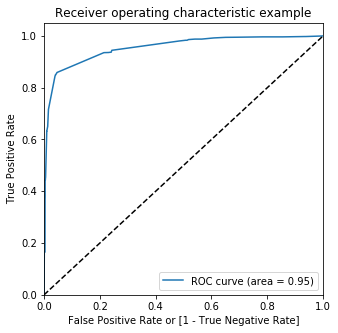

In [1263]:
# Plotting thee curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- Optimal Threshold

In [1264]:
# Let's Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5279,0,0.114192,5279,0,1,1,0,0,0,0,0,0,0,0
3099,0,0.736454,3099,1,1,1,1,1,1,1,1,1,0,0
91,1,0.242852,91,0,1,1,1,0,0,0,0,0,0,0
1577,1,0.999539,1577,1,1,1,1,1,1,1,1,1,1,1
487,0,0.242852,487,0,1,1,1,0,0,0,0,0,0,0


In [1265]:
#calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375063  1.000000  0.000000
0.1   0.1  0.689562  0.980604  0.514889
0.2   0.2  0.832177  0.935949  0.769897
0.3   0.3  0.917950  0.858367  0.953709
0.4   0.4  0.917780  0.850248  0.958311
0.5   0.5  0.918119  0.849346  0.959394
0.6   0.6  0.918119  0.849346  0.959394
0.7   0.7  0.917442  0.845286  0.960747
0.8   0.8  0.883776  0.716283  0.984299
0.9   0.9  0.853663  0.625620  0.990525


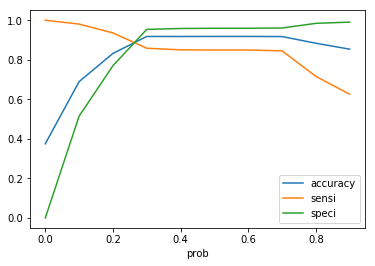

In [1266]:
# Plotting the accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From garph we could say that optimum point to take as cutoff is approx 0.25

In [1267]:
# Prediciton for cutoff 0.25
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5279,0,0.114192,5279,0,1,1,0,0,0,0,0,0,0,0,0
3099,0,0.736454,3099,1,1,1,1,1,1,1,1,1,0,0,1
91,1,0.242852,91,0,1,1,1,0,0,0,0,0,0,0,0
1577,1,0.999539,1577,1,1,1,1,1,1,1,1,1,1,1,1
487,0,0.242852,487,0,1,1,1,0,0,0,0,0,0,0,0


In [1268]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
5279,0,0.114192,5279,0,1,1,0,0,0,0,0,0,0,0,0,11
3099,0,0.736454,3099,1,1,1,1,1,1,1,1,1,0,0,1,74
91,1,0.242852,91,0,1,1,1,0,0,0,0,0,0,0,0,24
1577,1,0.999539,1577,1,1,1,1,1,1,1,1,1,1,1,1,100
487,0,0.242852,487,0,1,1,1,0,0,0,0,0,0,0,0,24


In [1269]:
# checking overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9181187616308577

In [1270]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3523,  171],
       [ 313, 1904]], dtype=int64)

In [1271]:
# Predicted     not_churn    churn
# Actual
# not_churn        3523      171
# churn            314       1903  

In [1272]:
# Metrices beyond simple accuracy
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1273]:
#see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8588182228236355

In [1274]:
#calculate specificity
TN / float(TN+FP)

0.9537087168381159

In [1275]:
#false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.046291283161884134


In [1276]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9184045881126173


In [1277]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9175903614457831


In [1278]:
# Recall
TP / (TP + FN)

0.8588182228236355

In [1279]:
# Precision
TP / (TP + FP)

0.9175903614457831

In [1280]:
# Recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8493459630130807

In [1281]:
# Precision Score
precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)

0.926217412690605

- Trade off

In [1282]:
# Precision and recall trade off
y_train_pred_final.Converted, y_train_pred_final.Predicted

(5279    0
 3099    0
 91      1
 1577    1
 487     0
 758     0
 7260    0
 7538    0
 2404    0
 8190    0
 6458    1
 442     0
 8418    0
 8550    0
 5829    0
 8221    0
 4057    1
 5258    1
 1917    0
 7674    1
 2004    1
 5172    0
 5457    0
 6139    0
 7532    0
 349     0
 1454    1
 6429    0
 897     0
 3937    1
        ..
 2801    0
 5157    0
 1024    0
 2       1
 3749    0
 5316    0
 4129    0
 4630    0
 3193    1
 6410    0
 7557    0
 3546    1
 5465    1
 2123    0
 6349    0
 2704    0
 6840    1
 6330    1
 8481    0
 1512    1
 4788    1
 923     1
 6196    0
 8665    0
 4541    0
 403     0
 90      0
 8805    1
 7595    1
 6190    0
 Name: Converted, Length: 5911, dtype: int64, 5279    0
 3099    1
 91      0
 1577    1
 487     0
 758     0
 7260    0
 7538    0
 2404    0
 8190    0
 6458    1
 442     0
 8418    0
 8550    0
 5829    0
 8221    0
 4057    1
 5258    1
 1917    0
 7674    1
 2004    1
 5172    0
 5457    0
 6139    0
 7532    1
 349     

In [1283]:
P, R, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

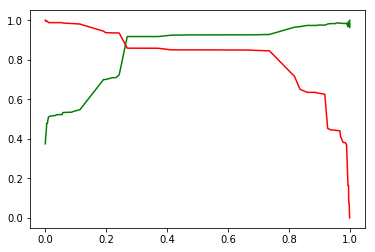

In [1284]:
# Plotting the curve
plt.plot(thresholds, P[:-1], "g-")
plt.plot(thresholds, R[:-1], "r-")
plt.show()

- Prediction on test data set

In [1285]:
# Scaling the numerical variable of test data set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5279,1,0,-0.314975,-0.504462,-0.037025,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3099,0,0,-0.314975,-0.480383,-0.037025,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
91,0,0,1.396648,1.279233,-0.340229,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1577,0,0,-1.170787,-0.865647,-1.249840,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
487,0,0,-0.314975,-0.617448,-0.037025,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1286]:
# Selecting only those column which are in the final model of train data set
X_test = X_test[col2]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
1926,0,0,0,0,0,0,1,0,0,0,0,0,0
5654,0,0,0,0,0,0,1,0,0,0,1,0,0
1209,0,0,0,0,0,0,0,0,1,0,0,0,0
5234,0,0,0,0,0,0,0,0,0,1,0,0,0
8497,0,0,0,0,0,0,0,0,0,0,1,0,0


In [1287]:
# adding constant
X_test_sm = sm.add_constant(X_test)
# Predicting value
y_test_pred = re.predict(X_test_sm)
y_test_pred[:10]

1926    0.918265
5654    0.818688
1209    0.007014
5234    0.004317
8497    0.090443
1918    0.114192
7405    0.087266
6561    0.002831
5492    0.989887
7851    0.818688
dtype: float64

In [1288]:
# Converting result into a dtaframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
1926,0.918265
5654,0.818688
1209,0.007014
5234,0.004317
8497,0.090443


In [1289]:
# Converting y_test into Dataframe
y_test_df = pd.DataFrame(y_test)
# Adding Prospect ID into dataframe
y_test_df['Prospect ID'] = y_test_df.index

In [1290]:
# Removing index from both the dataset so that to apend them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1291]:
# Appending both the dataframe
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,1926,0.918265
1,0,5654,0.818688
2,0,1209,0.007014
3,0,5234,0.004317
4,0,8497,0.090443


In [1292]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [1293]:
# Rearranging the column
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,1926,1,0.918265
1,5654,0,0.818688
2,1209,0,0.007014
3,5234,0,0.004317
4,8497,0,0.090443


In [1294]:
# Predicted converted
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,1926,1,0.918265,1
1,5654,0,0.818688,1
2,1209,0,0.007014,0
3,5234,0,0.004317,0
4,8497,0,0.090443,0


In [1295]:
# Overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.919889502762431

In [1296]:
# Confusion matrics
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1513,   73],
       [ 130,  818]], dtype=int64)

In [1297]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1298]:
# Let us calculate specificity
TN / float(TN+FP)

0.9539722572509458

In [1299]:
# Let's see the sensitivity of  logistic regression model
TP / float(TP+FN)

0.8628691983122363

# Subjective Question


In [1301]:
# Question 1 Selecting top 3 feature

# Selecting feature using RFE
logreg = LogisticRegression()
# RFE with 15 variables as output
rfe = RFE(logreg, 3)            
rfe = rfe.fit(X_train_sm, y_train)
rfe.support_

array([False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False])

In [1303]:
col_sub1 = X_train_sm.columns[rfe.support_]
col_sub1

Index(['Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS'], dtype='object')